### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Long-name, ik, but let's look at how it's implemented using sklearn

In [1]:
# Make necessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn libraries for datasets
from sklearn.datasets import make_moons
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# Sklearn libraries for ml models
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Sklearn libraries for metrics
from sklearn.metrics import silhouette_score


### Importing the dataset

In [2]:
# Creating a dataset to make our models learn on
X, y = make_moons(
    n_samples=1000,
    noise=0.10,
    random_state=42
    )

print("X shape:", X.shape)
print("y shape:", y.shape)
print("First 5 samples:\n", X[:5])

X shape: (1000, 2)
y shape: (1000,)
First 5 samples:
 [[-0.05146968  0.44419863]
 [ 1.03201691 -0.41974116]
 [ 0.86789186 -0.25482711]
 [ 0.288851   -0.44866862]
 [-0.83343911  0.53505665]]


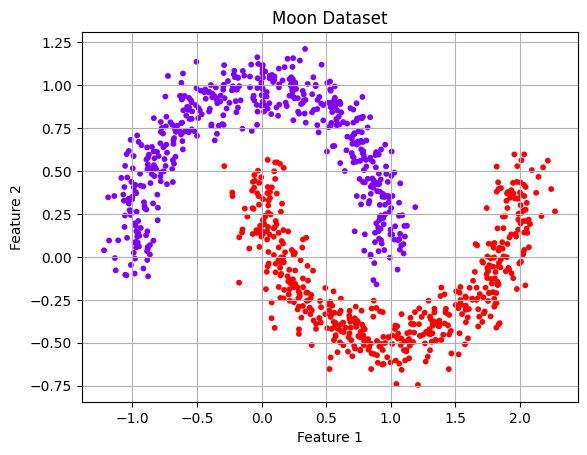

In [3]:
# Visualize the dataset to get a better feel for it
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", s = 10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moon Dataset")
plt.grid(True)
plt.show()

Observe how there are two clusters, we'll now compare DBSCAN with another popular algorithm KMeans to see where DBSCAN shines

### Hyperparameter tuning
Hyperparameters are parameters preset by data scientists(like us) to define any configurable part of a learning process </br>

There are no rules on how to set them, tuning depends largely on observing model performance on our training data.

In [4]:
# Tune the following hyperparameters

# Hyperparameters for DBSCAN
EPSILON = 0.1
MIN_SAMPLES = 2
METRIC = "euclidean"

# Hyperparameters for KMeans
N_CLUSTERS = 3

### Instantiating the Models
Scikit-learn provides a very simple API for building, training and evaluating ML models, let's see how to use it

In [5]:
# DBSCAN model instantiation
dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES, metric=METRIC)
dbscan.fit(X)
labels_dbscan = dbscan.labels_


# KMeans model instantation
kmeans = kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

### Plotting
Let's visually analyse how well each of the models performed

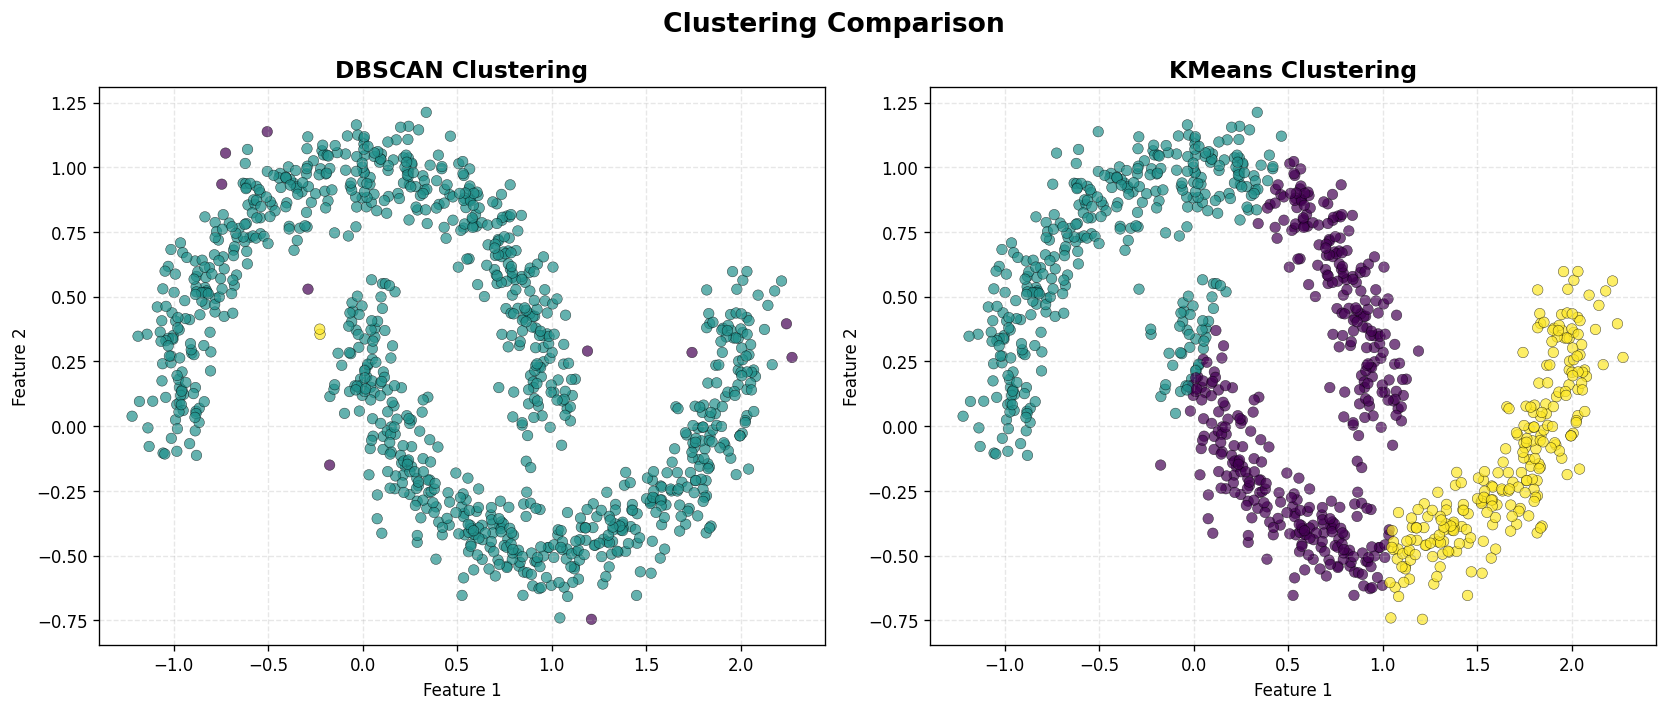

In [6]:
# Plot the labels
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=120)

# Plot DBSCAN generated clusters
axes[0].scatter(
    X[:, 0], X[:, 1],
    c=labels_dbscan,
    alpha=0.7,
    s=40,
    edgecolors="k",
    linewidths=0.3
)
axes[0].set_title("DBSCAN Clustering", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].grid(True, linestyle="--", alpha=0.3)

# Plot KMeans generated clusters
axes[1].scatter(
    X[:, 0], X[:, 1],
    c=labels_kmeans,
    alpha=0.7,
    s=40,
    edgecolors="k",
    linewidths=0.3
)
axes[1].set_title("KMeans Clustering", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].grid(True, linestyle="--", alpha=0.3)

plt.suptitle("Clustering Comparison", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


### Metrics to evaluate performance
In unsupervised Learning, there are no labels so we can't evaluate the performance intuitively using stuff like accuracy, instead we use a wide variety of metrics </br>

A popular metric to use is `silhouette_score` it is computed as


### Step 1: Compute a(i)

Average distance between point *i* and all other points in the same cluster.

$$
a(i) = \frac{1}{|C_i|-1} \sum_{j \in C_i, j \ne i} d(i, j)
$$

where $C_i$ is the cluster of point *i*.

---

### Step 2: Compute b(i)

Minimum average distance between point *i* and all points in the nearest different cluster.

$$
b(i) = \min_{k \ne C_i} \frac{1}{|C_k|} \sum_{j \in C_k} d(i, j)
$$

where $C_k$ represents another cluster.

---

### Step 3: Compute Silhouette Value s(i)

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

---

### Step 4: Overall Silhouette Score

The final silhouette score is the average over all points:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$




In [7]:
dbscan_score = silhouette_score(X, labels_dbscan)
kmeans_score = silhouette_score(X, labels_kmeans)

print(f"DBSCAN Silhouette Score: {dbscan_score:.4f}")
print(f"KMeans Silhouette Score: {kmeans_score:.4f}")

DBSCAN Silhouette Score: -0.1971
KMeans Silhouette Score: 0.4151


Note: Higher magnitude of silhouette score is usually better

Repeat on another popular dataset

In [8]:
# Import the make circles dataset
X, y = make_circles(
    n_samples=500,
    noise=0.01,
    random_state=42
    )

print("X shape:", X.shape)
print("y shape:", y.shape)
print("First 5 samples:\n", X[:5])

X shape: (500, 2)
y shape: (500,)
First 5 samples:
 [[-0.75096895  0.28327369]
 [-0.24150608  0.96952039]
 [-0.79406967  0.02158589]
 [-0.71724427 -0.67923311]
 [-0.85643236  0.52171277]]


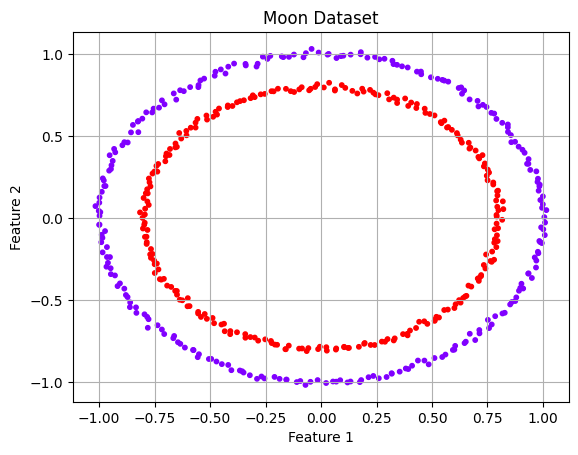

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow", s = 10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moon Dataset")
plt.grid(True)
plt.show()

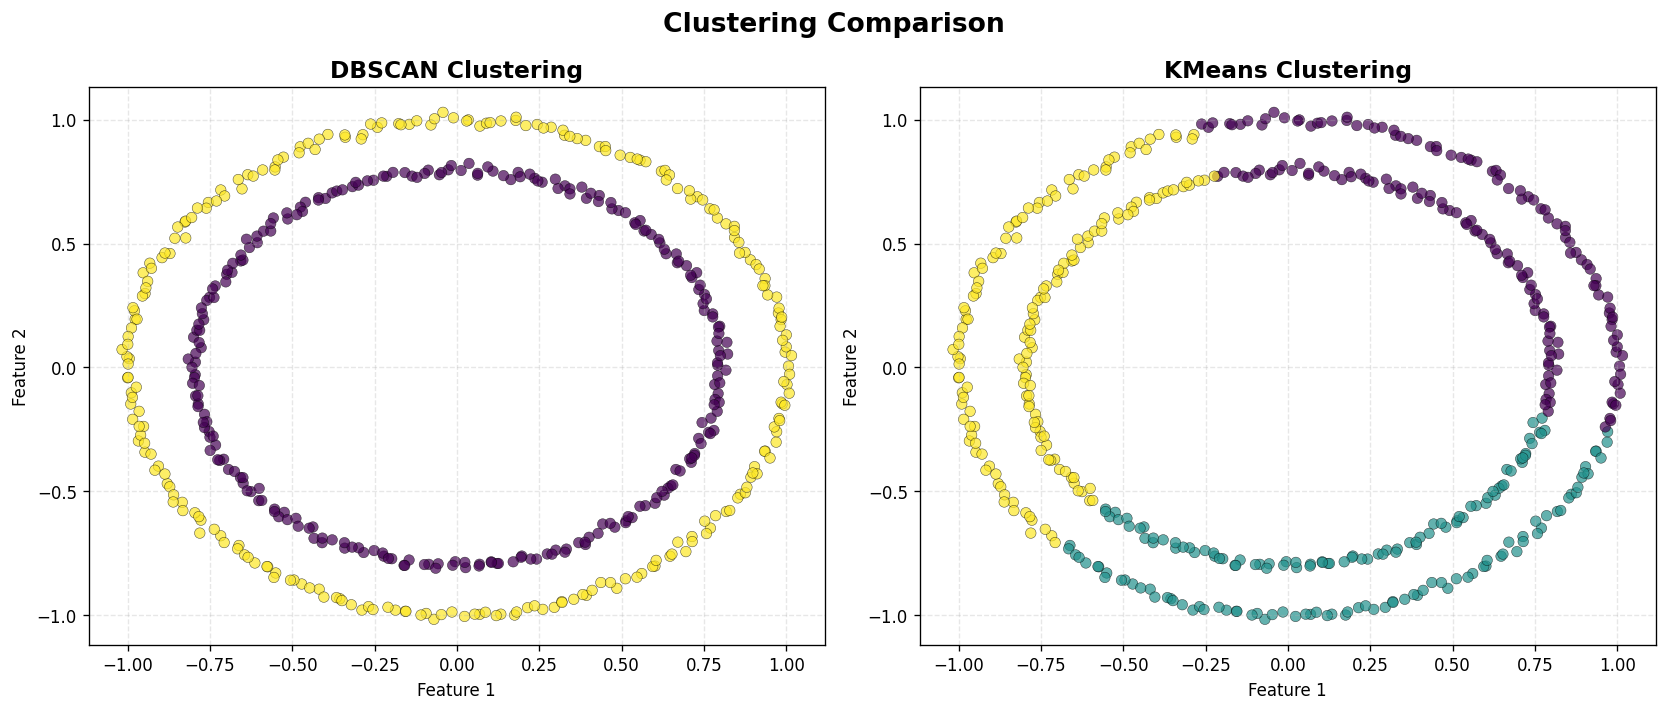

DBSCAN Silhouette Score: 0.0189
KMeans Silhouette Score: 0.4567


In [9]:
EPSILON = 0.1
MIN_SAMPLES = 2
METRIC = "euclidean"
N_CLUSTERS = 3

dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES, metric=METRIC)
dbscan.fit(X)
labels_dbscan = dbscan.labels_

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=120)

axes[0].scatter(
    X[:, 0], X[:, 1],
    c=labels_dbscan,
    alpha=0.7,
    s=40,
    edgecolors="k",
    linewidths=0.3
)
axes[0].set_title("DBSCAN Clustering", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].grid(True, linestyle="--", alpha=0.3)

axes[1].scatter(
    X[:, 0], X[:, 1],
    c=labels_kmeans,
    alpha=0.7,
    s=40,
    edgecolors="k",
    linewidths=0.3
)
axes[1].set_title("KMeans Clustering", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].grid(True, linestyle="--", alpha=0.3)

plt.suptitle("Clustering Comparison", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

dbscan_score = silhouette_score(X, labels_dbscan)
kmeans_score = silhouette_score(X, labels_kmeans)

print(f"DBSCAN Silhouette Score: {dbscan_score:.4f}")
print(f"KMeans Silhouette Score: {kmeans_score:.4f}")